This code uses the Clinton Station Meteorology data to find which year received highest average precipitation and quantitatively compare standard deviation of Wind Direction with Barometric Pressure. <br><br>


## Load in the data and set up dataframes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



#Load the csv data into pandas dataframe
Data = pd.read_csv('./Clinton_Station_met.csv')
Data.head(5)

#Drop non required column 
Met_Data = Data.drop(Data.columns[0],axis=1)
Met_Data.head(3)

#Convert Date column to datetime format
Met_Data["Date"] = pd.to_datetime(Met_Data["Date"])


print(Met_Data.keys())

FileNotFoundError: ignored

**Q.1)**  Which year received highest average precipitation? Support your answer with a plot *(10 points)*<br><br>

<font color=red> **2016 was the highest year for annual precipitation**</font>

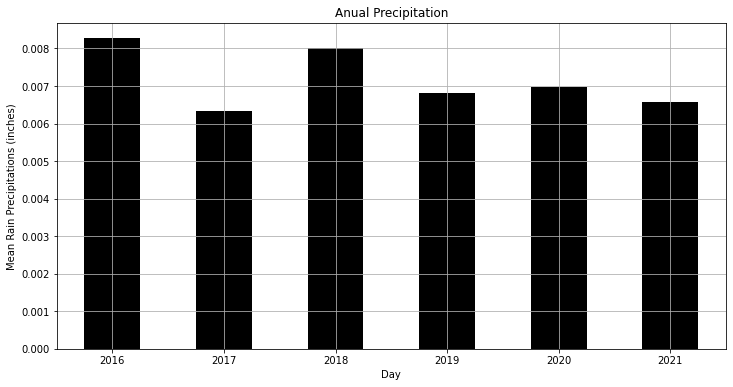

In [ ]:
"""
Why are the values on the y-axis so low?
"""

# Define figure
fig, ax = plt.subplots(figsize=(12,6))

# Group and plot parameters
precip_group=Met_Data.groupby(Met_Data['Date'].dt.year).mean()
precip_group['Rain Precipitation (inches)'].plot(kind='bar', rot=0, ax=ax, color='k')

# Set plot parameters
ax.set_xlabel('Day')
ax.set_ylabel('Mean Rain Precipitations (inches)')
ax.set_title('Anual Precipitation')
ax.grid(True)

**Q.2)** Explain relation of outdoor Tempearature with Solar Radiation with supporting plot *(10 points)*<br><br>


<font color=red> The majority of solar radiation tends to cluster around 60 to 95 degrees. Higher temperatures seem to be related with higher indexes of solar radiation concentrated in the denser areas. This makes sense, because higher temperatures usually means more sunlight, and greater intensity. Hence, there will likely be more UV radiation. The highest density is almost 0, at around 60-80 degrees, which is likely caused by cloudy days.</font>

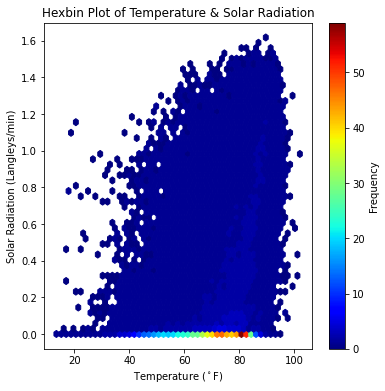

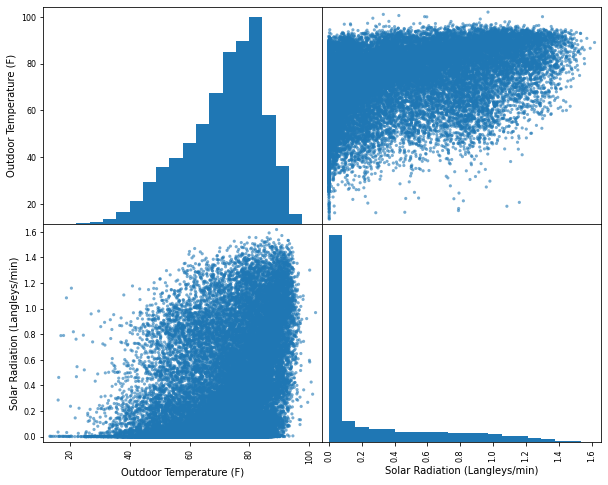

In [ ]:
#Hexagonal bin density plot  
fig, ax = plt.subplots(figsize=(6, 6))
hb = plt.hexbin(Met_Data["Outdoor Temperature (F)"],Met_Data['Solar Radiation (Langleys/min)'], gridsize=50, #gridsize sets the size of the grid
           bins=60, cmap='jet', mincnt=1)  #mincnt sets the minimum value for the color to be applied
plt.title("Hexbin Plot of Temperature & Solar Radiation")
plt.xlabel("Temperature ($^\circ$F)")  # custom x label using matplotlib
plt.ylabel("Solar Radiation (Langleys/min)")
cb = plt.colorbar(hb) #define colorbar
cb.set_label("Frequency") #set colorbar label
plt.show()

# Matrix plot for all years of outdoor temperature vs. solar radiation
# Trimmed_Data = Met_Data[["Outdoor Temperature (F)",'Solar Radiation (Langleys/min)']].copy()


# Plot Scatter Matrix plot 
pd.plotting.scatter_matrix(Met_Data[["Outdoor Temperature (F)",'Solar Radiation (Langleys/min)']], 
                           figsize=(10,8),
                           marker = 'o', 
                           hist_kwds = {'bins': 20}, 
                           s = 10, 
                           alpha = 0.6)
plt.show()



**Q.3)** Quantitatively compare standard deviation of Wind Direction with Barometric Pressure and comment on that *(5 points)*<br><br>



<font color=red> The highest density of STD vs barometric pressure is around 15 at ~1015 mBars. The density is located around the lowest level of STD as well. This makes sense, because the histogram shows that most of the measurements were taken at this pressure, approximately. These STD tells me about variation from the mean, which would likely occur during windy conditions, so I could infer that high, turbulent wind tends takes place in the pressure range of 1110 mBars to 1030 mBars. But, I am not an atmospheric scientist.

Looking at the calculated statistics, the barometric pressure has some outliers, as the mean and median are not equal and the data data is skew slightly, but overall normal.
</font>

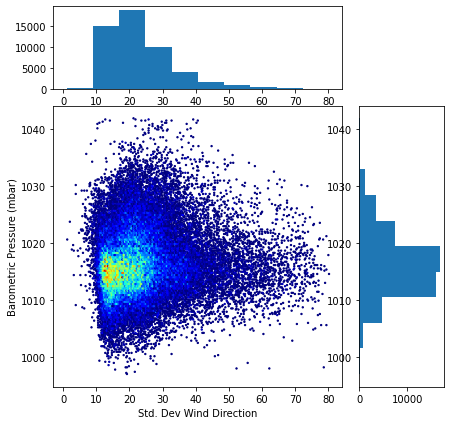

In [ ]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(7,7))
gs = GridSpec(4, 4)
ax_hexbin = fig.add_subplot(gs[1:4, 0:3])
ax_hist_x = fig.add_subplot(gs[0,0:3])
ax_hist_y = fig.add_subplot(gs[1:4, 3])

ax_hexbin.hexbin(Met_Data['Std. Dev Wind Direction'],Met_Data["Barometric Pressure (mbar)"],
                 gridsize=200, bins=50, cmap='jet', mincnt=1)
ax_hexbin.set_xlabel('Std. Dev Wind Direction')  
ax_hexbin.set_ylabel("Barometric Pressure (mbar)")

ax_hist_x.hist(Met_Data['Std. Dev Wind Direction'])
ax_hist_y.hist(Met_Data["Barometric Pressure (mbar)"], orientation = 'horizontal')
plt.show()

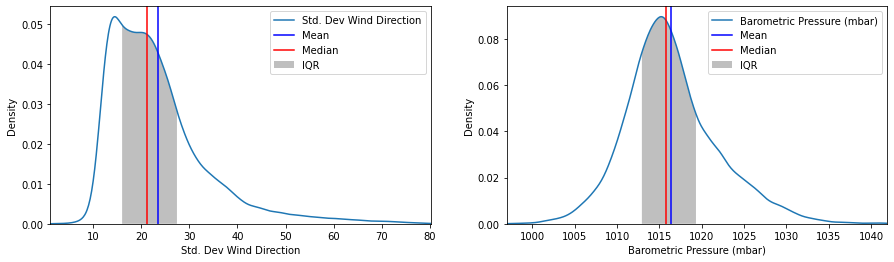

In [ ]:
#Basic statistics of each data column within the the Pandas dataframe
Met_Statistics = Met_Data.describe()
print(Met_Statistics)

Name_List = ['Std. Dev Wind Direction',"Barometric Pressure (mbar)"]

fig, axs = plt.subplots(figsize=(15, 4),nrows=1, ncols=2)

for n, names in enumerate(Name_List):
    ax = plt.subplot(1, 2, n + 1)
    dplot = Met_Data[Name_List[n]].plot.kde(ax=ax)
    ax.set_xlabel(Name_List[n])
    ax.set_ylabel("Density")
    plt.axvline(x = Met_Statistics[Name_List[n]].iloc[1], color = 'b', label = 'Mean') #Mean
    plt.axvline(x = Met_Statistics[Name_List[n]].iloc[5], color = 'r', label = 'Median') #Median
    line_y = dplot.lines[0]._y #y-coordinates of plot
    line_x = dplot.lines[0]._x #x-coordinates of plot
    ax.fill_between(line_x, line_y, where=(line_x>Met_Statistics[Name_List[n]].iloc[4]) & (line_x<Met_Statistics[Name_List[n]].iloc[6]), 
                    facecolor='grey', alpha=0.5, label = 'IQR')
    ax.set_ylim(0, max(line_y+(line_y/20))) 
    plt.xlim(min(Met_Data[Name_List[n]]), max(Met_Data[Name_List[n]])) #Set max and min of x-axis based on dataset
    handles, labels = ax.get_legend_handles_labels() #Extract handles and labels based on data provided for plotting
    ax.legend(handles, labels) #plot legend

plt.show() 